In [11]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def bernoulli1 (p) :
    if np.random() <= p :
        return 1
    else :
        return 0
    

In [8]:
def bernoulli2(p):
    
     return np.random.binomial(1, p, 1)
#test
bernoulli2(0.9)

array([1])

In [16]:
def binomiale(n,p,ncases):
    return np.random.binomial(n, p, ncases)

#test
binomiale(10,0.8,1)

array([8])

In [18]:
def histogramme(n,p,ncase):
    vect = binomiale(n,p,1000)
    plt.hist(vect)
    plt.show()

#test
histogramme(1000,0.7,1000)

1. Loi normale centrée

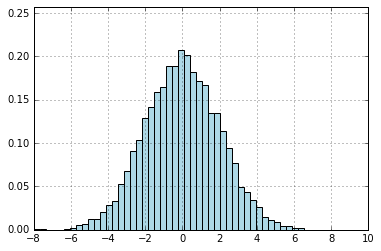

In [97]:
def normale ( k, sigma ):
    if k % 2 == 0:
        raise ValueError ( 'le nombre k doit etre impair' )
    mu = 0.0
    sigma = 2.0
    data = np.random.randn(k) * sigma + mu
    hx, hy, _ = plt.hist(data, bins=50, normed=1,color="lightblue")
    plt.ylim(0.0,max(hx)+0.05)
    plt.grid()
    plt.show()
#test
normale ( 10001 ,0.5 )

2. Distribution de probabilité affine

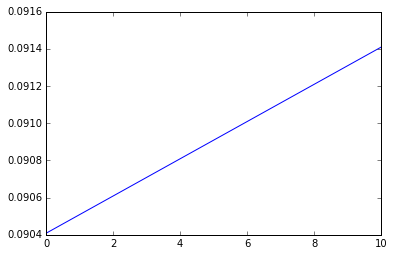

array([ 0.09040909,  0.09050909,  0.09060909,  0.09070909,  0.09080909,
        0.09090909,  0.09100909,  0.09110909,  0.09120909,  0.09130909,
        0.09140909])

In [107]:
def proba_affine ( k, slope ):
    if k % 2 == 0:
        raise ValueError ( 'le nombre k doit etre impair' )
    if abs ( slope  ) > 2. / ( k * k ):
        raise ValueError ( 'la pente est trop raide : pente max = ' +
        str ( 2. / ( k * k ) ) )
    if ( slope == 0):
        vect = np.array([1.1/k]*k)
    else:
        vect = np.array([  1.0/k +( i - ( ( k-1 )/2.0 ))*slope for i in range(k)  ])
        plt.plot(vect)
        plt.show()
    return vect

#test
proba_affine(11,0.0001)
        

3. Distribution jointe

In [25]:
PA = np.array ( [0.2, 0.7, 0.1] )
PB = np.array ( [0.4, 0.4, 0.2] )

In [33]:
def Pxy ( PA,PB ):
    mat =  [  [(round(i*j,2)) for j in PA ]  for i in PB     ]
    return np.array(mat)
#
t = Pxy(PA,PB)
t

array([[ 0.08,  0.28,  0.04],
       [ 0.08,  0.28,  0.04],
       [ 0.04,  0.14,  0.02]])

4. Affichage de la distribution jointe

In [34]:
from mpl_toolkits.mplot3d import Axes3D

def dessine ( P_jointe ):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace ( -3, 3, P_jointe.shape[0] )
    y = np.linspace ( -3, 3, P_jointe.shape[1] )
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, P_jointe, rstride=1, cstride=1 )
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('P(A) * P(B)')
    plt.show ()
#test
dessine(Pxy(PA,PB))

# Indépendances conditionnelles

In [75]:
#distribution jointe :

P_XYZT = np.array([[[[ 0.0192,  0.1728],
                     [ 0.0384,  0.0096]],

                    [[ 0.0768,  0.0512],
                     [ 0.016 ,  0.016 ]]],

                   [[[ 0.0144,  0.1296],
                     [ 0.0288,  0.0072]],

                    [[ 0.2016,  0.1344],
                     [ 0.042 ,  0.042 ]]]])
mat = P_XYZT
tab1=mat[0][0]



In [148]:
def P_YZ(mat):
    t = np.zeros((2,2))
    for i in range(2):
        for j in range(2):

            t[0][0] += mat[i][0][0][j]
            t[1][0] += mat[i][1][0][j]
            t[1][1] += mat[i][1][1][j]
            t[0][1] += mat[i][0][1][j]
    return t

#test
P_YZ(P_XYZT )

array([[ 0.336,  0.084],
       [ 0.464,  0.116]])